<a href="https://colab.research.google.com/github/gianmarcomejia96/UTEC_PROGRA/blob/main/11_Logistic_regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('titanic.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.drop('Cabin',axis=1,inplace=True) # eliminamos la columna cabina
train.drop('Name',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)
train.dropna(inplace=True) # eliminamos las muestras vacias
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True) # categorizamos el genero [0,1]
embark = pd.get_dummies(train['Embarked'],drop_first=True) # categorizamos el embarked
#onehot encoding

train = pd.concat([train,sex,embark],axis=1) # unimos todo
train.drop(['Sex','Embarked'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
X= train.drop('Survived',axis=1)
y= train['Survived'] #trying to predict


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logmodel.predict(X_test)
print(X_test)
print(y_pred)

     Pclass   Age  SibSp  Parch      Fare   male      Q      S
225       3  22.0      0      0    9.3500   True  False   True
449       1  52.0      0      0   30.5000   True  False   True
750       2   4.0      1      1   23.0000  False  False   True
261       3   3.0      4      2   31.3875   True  False   True
283       3  19.0      0      0    8.0500   True  False   True
..      ...   ...    ...    ...       ...    ...    ...    ...
252       1  62.0      0      0   26.5500   True  False   True
800       2  34.0      0      0   13.0000   True  False   True
374       3   3.0      3      1   21.0750  False  False   True
460       1  48.0      0      0   26.5500   True  False   True
195       1  58.0      0      0  146.5208  False  False  False

[214 rows x 8 columns]
[0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0

Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: your true labels and predicted labels
# y = [actual labels]
# y_pred = [predicted labels]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.7944
Precision: 0.7561
Recall:    0.7209
F1 Score:  0.7381


Confusion matrix

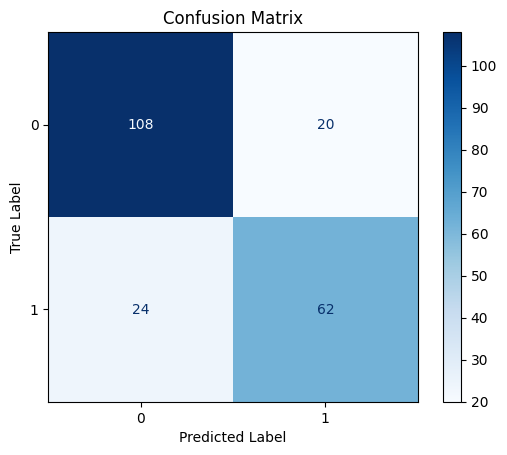

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example data
# y = [true labels]
# y_pred = [predicted labels]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()
